In [1]:
#Import library yang dibutuhkan
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
#sns.set_style("whitegrid")
sns.set(style="darkgrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)
img_fmt = 'svg'

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
# Cek apakah data yang missing/null dll
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]
missing_data(df)

,columns,Num of Miss,Perc of Miss
3,director,2389,30.679337
4,cast,718,9.220496
5,country,507,6.510851
6,date_added,10,0.128419
8,rating,7,0.089893


In [5]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [6]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,show_id,object,0,0.00,7787,"[s4985, s5965, s4059]",100.00
1,type,object,0,0.00,2,[Movie],0.03
2,title,object,0,0.00,7787,"[King of Peking, The Devil We Know, The Art of...",100.00
3,director,object,2389,30.68,4049,"[Adam McKay, Shadab Khan, Lee Seung-won]",52.00
4,cast,object,718,9.22,6831,"[Yang Mi, Mark Chao, Dilraba Dilmurat, Ken Cha...",87.72
5,country,object,507,6.51,681,"[India, China, Turkey]",8.75
6,date_added,object,10,0.13,1565,"[December 6, 2019, June 1, 2019, October 17, 2...",20.10
7,release_year,int64,0,0.00,73,"[2015, 2011, 2016]",0.94
8,rating,object,7,0.09,14,"[TV-MA, TV-14]",0.18
9,duration,object,0,0.00,216,"[1 Season, 110 min]",2.77


In [8]:
# Mengubah kolom tahun rilis dan tanggal ditambahkan ke format waktu 
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['date_added'] = pd.to_datetime(df['date_added'])
indeks = df[np.isnan(df['date_added'])].index
df.loc[indeks, 'date_added'] = df.loc[indeks, 'release_year']
df['release_year'] = df['release_year'].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7787 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [14]:
# Melihat barplot antara type and rating
df_type_rating = df.groupby(['type', 'rating']).count().show_id.reset_index().sort_values(by='show_id').tail(10)
df_type_rating

,type,rating,show_id
21,TV Show,TV-Y7,176
3,Movie,PG,247
19,TV Show,TV-PG,301
4,Movie,PG-13,386
9,Movie,TV-PG,505
16,TV Show,TV-14,659
5,Movie,R,663
18,TV Show,TV-MA,1018
6,Movie,TV-14,1272
8,Movie,TV-MA,1845


## EDA

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Video Content in each Type and Rating')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Count')

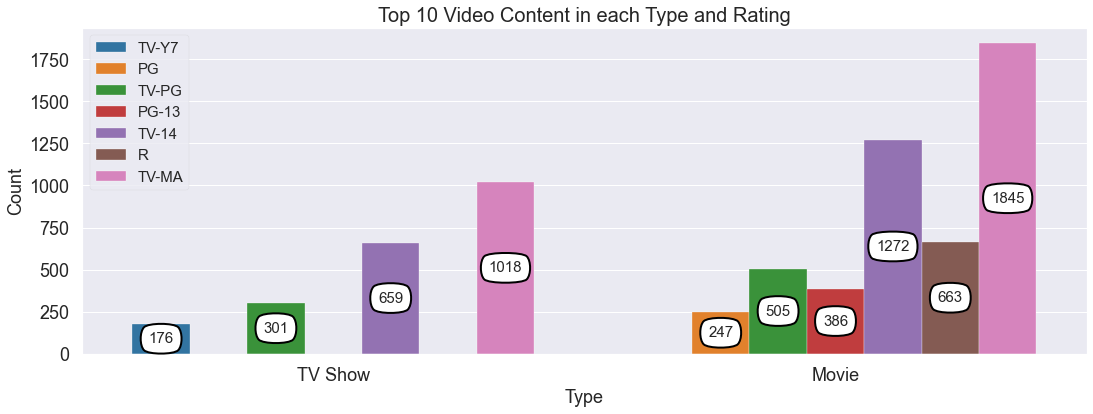

In [25]:
plt.figure(figsize=(18,6))
plots = sns.barplot(data = df_type_rating, x='type', y='show_id',  hue='rating')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.title('Top 10 Video Content in each Type and Rating')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.show()

In [26]:
countries = {}
for country in df.country.dropna():
    for sub_country in str(country).split(', '):
        if sub_country not in countries :
            countries[sub_country] = 1 
        else :
            countries[sub_country] += 1

In [27]:
countries

{'Brazil': 88,
 'Mexico': 154,
 'Singapore': 39,
 'United States': 3296,
 'Turkey': 108,
 'Egypt': 110,
 'India': 990,
 'Poland': 35,
 'Thailand': 65,
 'Nigeria': 76,
 'Norway': 29,
 'Iceland': 9,
 'United Kingdom': 722,
 'Japan': 287,
 'South Korea': 212,
 'Italy': 90,
 'Canada': 412,
 'Indonesia': 80,
 'Romania': 12,
 'Spain': 215,
 'South Africa': 54,
 'France': 349,
 'Portugal': 4,
 'Hong Kong': 102,
 'China': 147,
 'Germany': 199,
 'Argentina': 82,
 'Serbia': 7,
 'Denmark': 44,
 'Kenya': 5,
 'New Zealand': 28,
 'Pakistan': 24,
 'Australia': 144,
 'Taiwan': 85,
 'Netherlands': 45,
 'Philippines': 78,
 'United Arab Emirates': 34,
 'Iran': 4,
 'Belgium': 85,
 'Israel': 26,
 'Uruguay': 14,
 'Bulgaria': 9,
 'Chile': 26,
 'Russia': 27,
 'Mauritius': 1,
 'Lebanon': 26,
 'Colombia': 45,
 'Algeria': 2,
 'Soviet Union': 3,
 'Sweden': 39,
 'Malaysia': 26,
 'Ireland': 40,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 11,
 'Peru': 10,
 'Senegal': 3,
 'Switzerland': 17,
 'Ghana': 4,
 'Saudi Ar

In [36]:
df_countries = pd.DataFrame(list(countries.items()), columns=['country', 'count']).sort_values(by=['count'])
df_countries_5 = df_countries.tail(5)
df_countries_5

,country,count
21,France,349
16,Canada,412
12,United Kingdom,722
6,India,990
3,United States,3296


<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Top 5 Country in term of Movies Released')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Count')

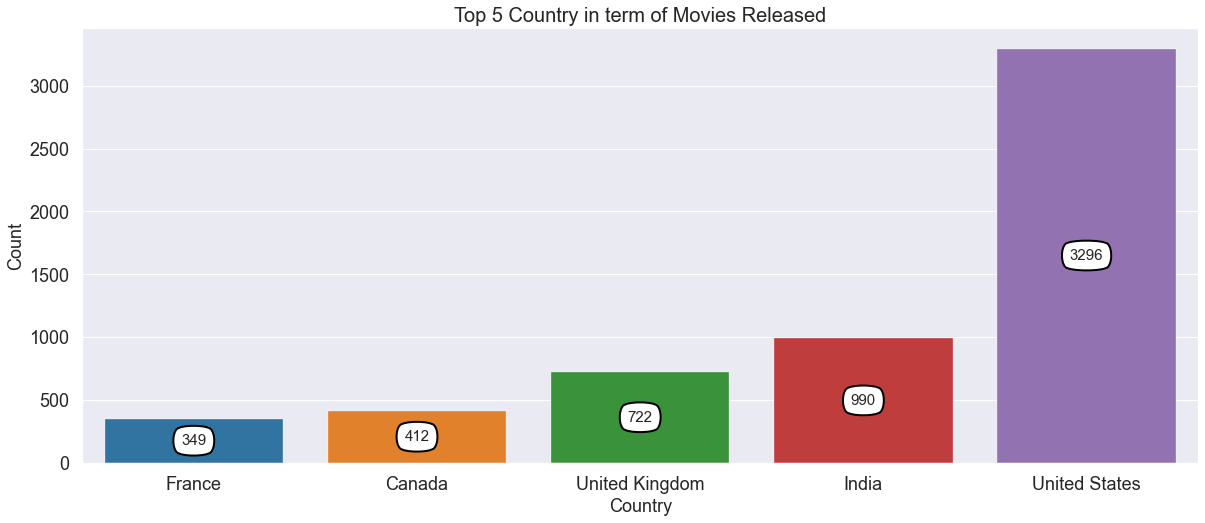

In [39]:
# Membuat Grafik 5 Negara terbanyak rilis Movies
plt.figure(figsize=(20,8))
plots = sns.barplot(data=df_countries_5, x='country', y='count')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.title('Top 5 Country in term of Movies Released')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [54]:
release = df['release_year'].value_counts()
release = release.sort_values(ascending=True)
release = pd.DataFrame(release)

In [56]:
released = df.groupby('release_year').count()

In [62]:
release = released[-13:-1]

In [63]:
release

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
2009,137,137,137,102,136,132,137,137,137,137,137
2010,173,173,173,133,164,162,173,172,173,173,173
2011,166,166,166,124,161,163,166,166,166,166,166
2012,219,219,219,159,208,208,219,219,219,219,219
2013,267,267,267,204,248,257,267,266,267,267,267
2014,334,334,334,247,310,315,334,334,334,334,334
2015,541,541,541,385,496,502,541,538,541,541,541
2016,882,882,882,637,783,820,882,882,882,882,882
2017,1012,1012,1012,750,893,958,1012,1010,1012,1012,1012


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Number of videos in release of Year')

Text(0.5, 0, 'Release Year')

Text(0, 0.5, 'Count')

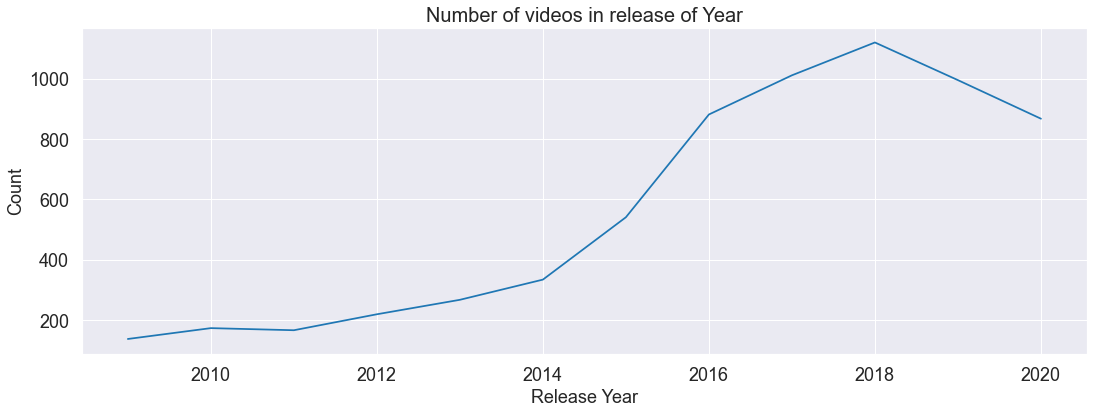

In [64]:
plt.figure(figsize=(18,6))
sns.lineplot(data = release, x = 'release_year', y = 'show_id')
plt.title('Number of videos in release of Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [75]:
rating = df['rating'].value_counts()

In [76]:
rating

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

<Figure size 1296x432 with 0 Axes>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

No handles with labels found to put in legend.


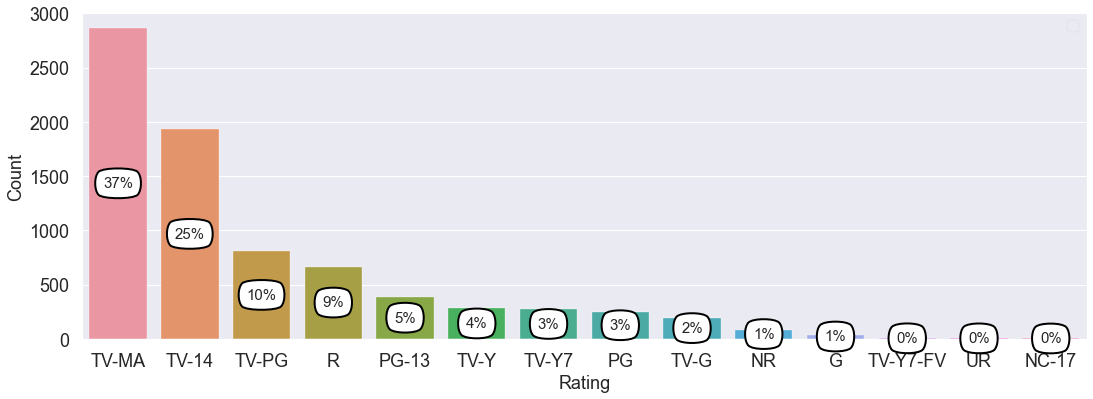

In [78]:
plt.figure(figsize=(18,6))
plots = sns.barplot(x=rating.index, y=rating.values)
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height()/rating.sum()*100, '.0f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.show()

In [81]:
country_rating = df.groupby(['rating', 'country']).count().sort_values('show_id', ascending=False).reset_index()
country_rating

,rating,country,show_id,type,title,director,cast,date_added,release_year,duration,listed_in,description
0,TV-MA,United States,880,880,880,583,744,880,880,880,880,880
1,TV-14,India,520,520,520,491,513,520,520,520,520,520
2,TV-14,United States,378,378,378,206,310,378,378,378,378,378
3,R,United States,364,364,364,363,358,364,364,364,364,364
4,TV-PG,United States,241,241,241,144,184,241,241,241,241,241
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,TV-14,"France, United States",1,1,1,0,1,1,1,1,1,1
1072,TV-14,"Georgia, Germany, France",1,1,1,1,1,1,1,1,1,1
1073,TV-14,"Germany, Italy",1,1,1,1,0,1,1,1,1,1
1074,TV-14,"Germany, Jordan, Netherlands",1,1,1,1,1,1,1,1,1,1


In [82]:
country_rating['country_and_rating'] = country_rating[['country','rating']].apply(axis=1,func = lambda x : str(x.country)+'--'+str(x.rating))

In [84]:
country_rating
country_rating.set_index(keys = 'country_and_rating', inplace = True)

,rating,country,show_id,type,title,director,cast,date_added,release_year,duration,listed_in,description,country_and_rating
0,TV-MA,United States,880,880,880,583,744,880,880,880,880,880,United States--TV-MA
1,TV-14,India,520,520,520,491,513,520,520,520,520,520,India--TV-14
2,TV-14,United States,378,378,378,206,310,378,378,378,378,378,United States--TV-14
3,R,United States,364,364,364,363,358,364,364,364,364,364,United States--R
4,TV-PG,United States,241,241,241,144,184,241,241,241,241,241,United States--TV-PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,TV-14,"France, United States",1,1,1,0,1,1,1,1,1,1,"France, United States--TV-14"
1072,TV-14,"Georgia, Germany, France",1,1,1,1,1,1,1,1,1,1,"Georgia, Germany, France--TV-14"
1073,TV-14,"Germany, Italy",1,1,1,1,0,1,1,1,1,1,"Germany, Italy--TV-14"
1074,TV-14,"Germany, Jordan, Netherlands",1,1,1,1,1,1,1,1,1,1,"Germany, Jordan, Netherlands--TV-14"


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Most Popular Program in Country and Rating')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Country and Rating')

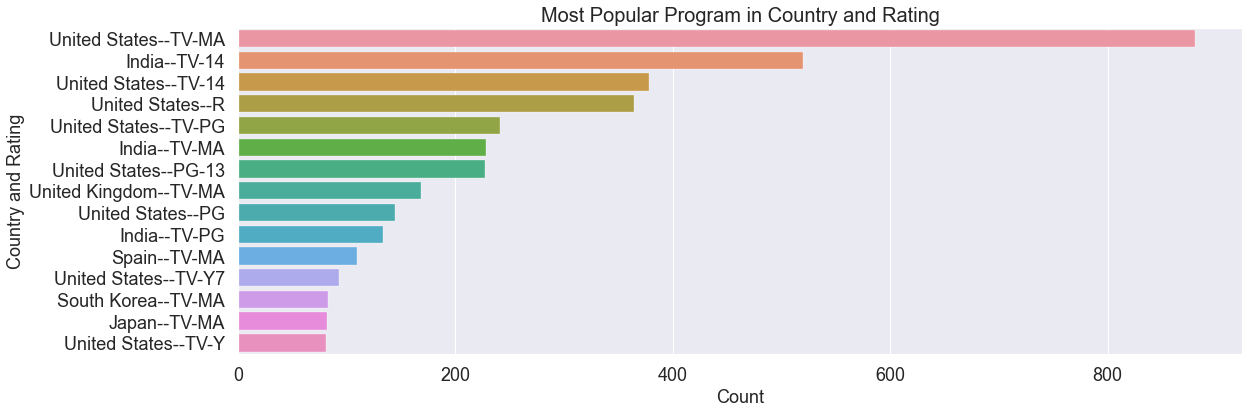

In [86]:
plt.figure(figsize=(18,6))
sns.barplot(y=country_rating.index[:15], x = country_rating['show_id'][:15])
plt.title('Most Popular Program in Country and Rating')
plt.xlabel('Count')
plt.ylabel('Country and Rating')
plt.show()

In [87]:
movie = df.copy()
movie = movie[movie['type'] == 'Movie']

movie['minute'] = [int(re.findall('\d{1,3}', w)[0]) for w in movie.duration.ravel()]

duration_rating = movie.groupby(['rating']).mean().sort_values('minute')

In [88]:
duration_rating

,release_year,minute
rating,,
TV-Y,2017.196581,46.538462
TV-Y7,2015.442105,61.684211
TV-Y7-FV,2015.000000,68.400000
TV-G,2015.828829,79.927928
G,1998.410256,88.076923
TV-PG,2012.019802,94.786139
TV-MA,2015.712195,95.386450
NR,2010.556962,95.443038
PG,2008.935223,98.526316


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Average run time in each Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Averag Run Time')

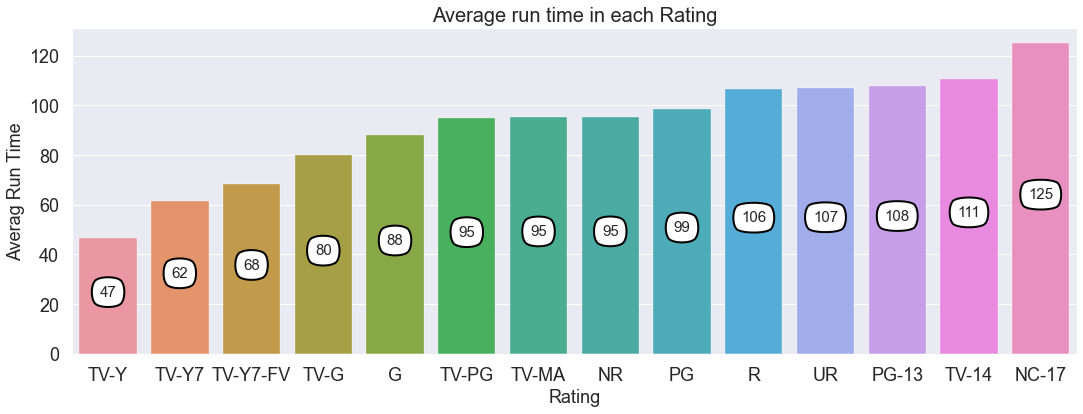

In [92]:
plt.figure(figsize=(18,6))
plots = sns.barplot(x=duration_rating.index, y=duration_rating.minute.values)
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.title('Average run time in each Rating')
plt.xlabel('Rating')
plt.ylabel('Averag Run Time')
plt.show()

In [93]:
duration_year = movie.groupby(['release_year']).mean().sort_values('minute')
duration_year

,minute
release_year,
1942,35.000000
1947,42.000000
1945,51.333333
1944,52.000000
1946,58.000000
...,...
1960,143.500000
1965,151.500000
1962,167.000000


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Year on Year Duration of Movie')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Duration of Movie')

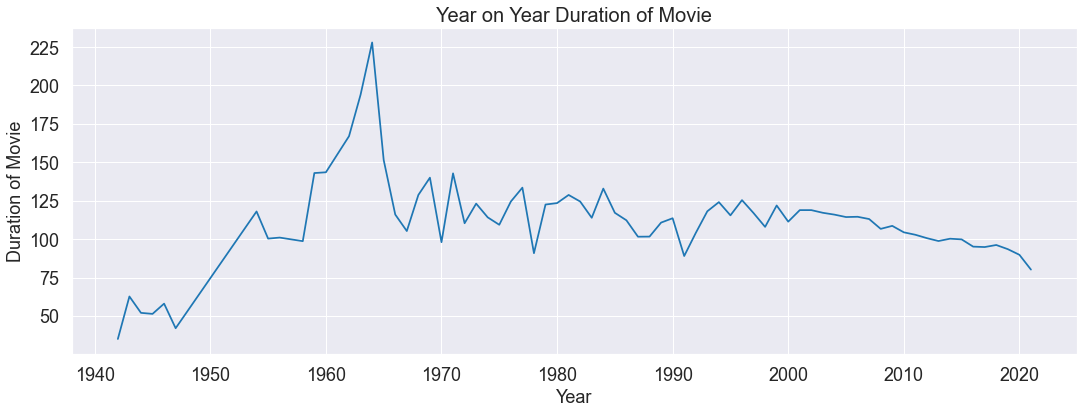

In [95]:
plt.figure(figsize=(18,6))
sns.lineplot(x=duration_year.index, y=duration_year.minute.values)
plt.title('Year on Year Duration of Movie')
plt.xlabel('Year')
plt.ylabel('Duration of Movie')
plt.show()

In [97]:
director_minute = movie.groupby('director').sum().sort_values('minute', ascending = False)
director_minute

,release_year,minute
director,,
Martin Scorsese,23922,1706
Cathy Garcia-Molina,26188,1537
Youssef Chahine,23717,1482
Steven Spielberg,19982,1367
David Dhawan,18049,1248
...,...,...
Mathieu Auvray,2015,12
Frank E. Abney III,2020,9
"Arnon Manor, Timothy Ware-Hill",2020,8


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Top 10 most Productive Director Movies in Minute')

Text(0.5, 0, 'Length of Total Movies Released in Minute')

Text(0, 0.5, 'Director Name')

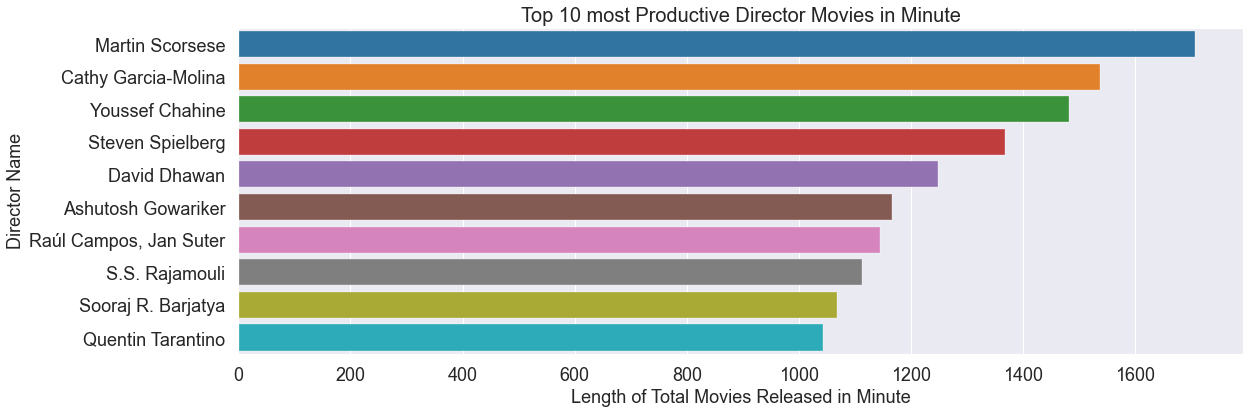

In [99]:
plt.figure(figsize=(18,6))
sns.barplot(x=director_minute.minute[:10], y = director_minute.index[:10])
plt.title('Top 10 most Productive Director Movies in Minute')
plt.xlabel('Length of Total Movies Released in Minute')
plt.ylabel('Director Name')
plt.show()

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Most Productive Director')

Text(0.5, 0, 'Count of Movies')

Text(0, 0.5, 'Director Name')

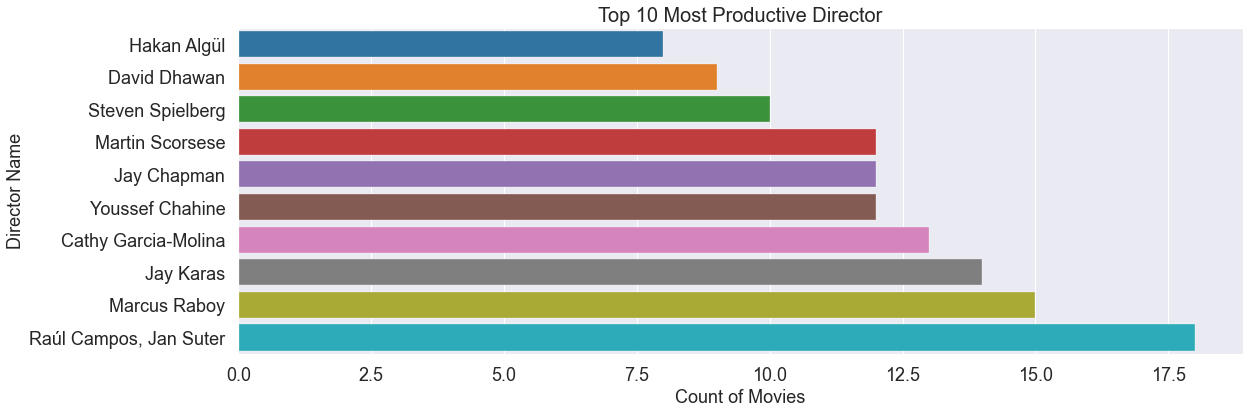

In [101]:
plt.figure(figsize=(18,6))
sns.barplot(x=movie.director.value_counts()[:10].sort_values().values, 
            y=movie.director.value_counts()[:10].sort_values().index)
plt.title('Top 10 Most Productive Director')
plt.xlabel('Count of Movies')
plt.ylabel('Director Name')
plt.show()

## NLP

In [102]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [103]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [104]:
def text_cleanser(text):
    stemmer = WordNetLemmatizer()
    text = ''.join([char for char in text if (char.isalpha() or char.isspace()) and char !="'"])
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in text]
sample_text = "Hello! This is me. I need to verify whether this sentence is working correctly."
print(text_cleanser(sample_text))

['hello', 'need', 'verify', 'whether', 'sentence', 'working', 'correctly']


In [105]:
df_desc = df[['show_id', 'description']].set_index('show_id')
df_desc['turn_desc'] = df_desc['description'].apply(lambda x : text_cleanser(x))

In [106]:
df_desc

,description,turn_desc
show_id,,
s1,In a future where the elite inhabit an island ...,"[future, elite, inhabit, island, paradise, far..."
s2,After a devastating earthquake hits Mexico Cit...,"[devastating, earthquake, hit, mexico, city, t..."
s3,"When an army recruit is found dead, his fellow...","[army, recruit, found, dead, fellow, soldier, ..."
s4,"In a postapocalyptic world, rag-doll robots hi...","[postapocalyptic, world, ragdoll, robot, hide,..."
s5,A brilliant group of students become card-coun...,"[brilliant, group, student, become, cardcounti..."
...,...,...
s7783,When Lebanon's Civil War deprives Zozo of his ...,"[lebanon, civil, war, deprives, zozo, family, ..."
s7784,A scrappy but poor boy worms his way into a ty...,"[scrappy, poor, boy, worm, way, tycoon, dysfun..."
s7785,"In this documentary, South African rapper Nast...","[documentary, south, african, rapper, nasty, c..."


In [107]:
vocabulary = {}
for words in df_desc.turn_desc :
    for word in words :
        if word in vocabulary :
            vocabulary[word] = vocabulary[word]+1
        else:
            vocabulary[word] = 0

df_voc = pd.DataFrame(list(vocabulary.items()), columns=['text', 'count'])

In [108]:
df_voc

,text,count
0,future,94
1,elite,59
2,inhabit,2
3,island,61
4,paradise,11
...,...,...
17079,introducing,0
17080,adriano,0
17081,zumbo,0
17082,mystique,0


In [109]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [116]:
text = df_voc.text.values
text

array(['future', 'elite', 'inhabit', ..., 'zumbo', 'mystique',
       'bluesrock'], dtype=object)

<Figure size 1440x1440 with 0 Axes>

(-0.5, 999.5, 999.5, -0.5)

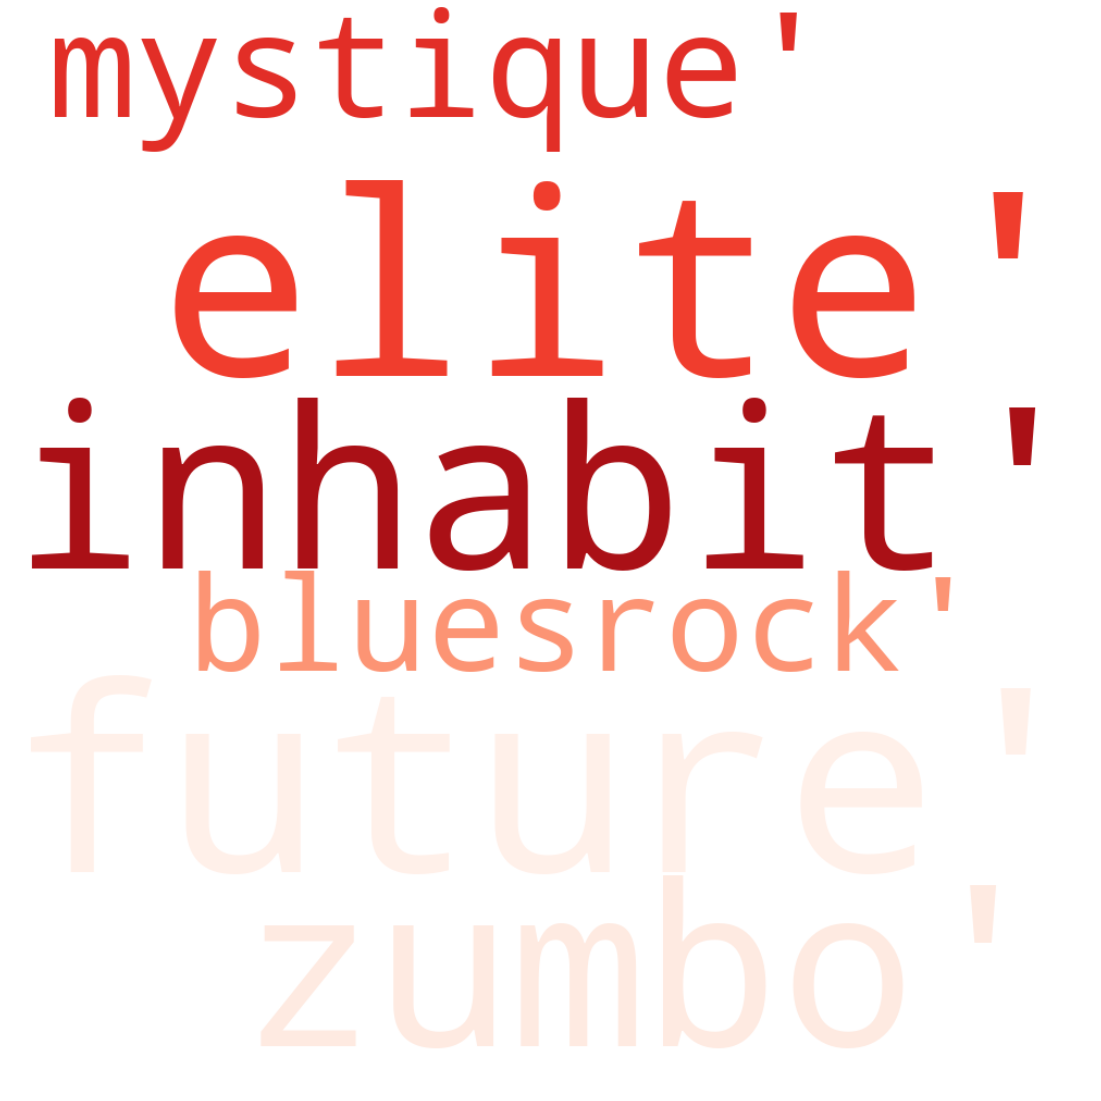

In [117]:
text = df_voc.text.values
plt.rcParams['figure.figsize'] = (13,13)

word_cloud=WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(str(text))

plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
bow_transformer = CountVectorizer(analyzer = text_cleanser).fit(df_desc['description'])
desc_bow = bow_transformer.transform(df_desc['description'])
print('Shape of the generated matrix : ',desc_bow.shape)
sparsity = desc_bow.nnz/(desc_bow.shape[0]*desc_bow.shape[1])*100.0
print('Sparsity of the generated matrix',round(sparsity,4))

Shape of the generated matrix :  (7787, 17084)
Sparsity of the generated matrix 0.0835


In [112]:
# Finding TF and IDF metrics
tfidf_transformer = TfidfTransformer().fit(desc_bow)
desc_tfidf = tfidf_transformer.transform(desc_bow)

In [113]:
desc_tfidf

<7787x17084 sparse matrix of type '<class 'numpy.float64'>'
	with 111056 stored elements in Compressed Sparse Row format>

In [118]:
# Cluster the description data using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(desc_tfidf)
df['predicted_group'] = kmeans.labels_.tolist()
df.predicted_group.value_counts()

0    4825
2     963
4     848
3     847
1     304
Name: predicted_group, dtype: int64

In [119]:
title = ''
genres = {}
for genre in df.listed_in.dropna():
    for sub_genre in str(genre).split(', '):
        if sub_genre not in genres:
            genres[sub_genre] = 1
        else: genres[sub_genre] += 1
df_genres = pd.DataFrame(list(genres.items()),columns = ['genre','count']).sort_values(by = ['count'])

In [120]:
bow_transformer = CountVectorizer(analyzer = lambda x : x.split(', ')).fit(df.listed_in)
genre_bow = bow_transformer.transform(df.listed_in)
print('Shape of the generated matrix : ',genre_bow.shape)
sparsity = genre_bow.nnz/(genre_bow.shape[0]*genre_bow.shape[1])*100.0
print('Sparsity of the generated matrix',round(sparsity,4))

Shape of the generated matrix :  (7787, 42)
Sparsity of the generated matrix 5.2196


In [121]:
# Finding TF and IDF metrics
tfidf_transformer = TfidfTransformer().fit(genre_bow)
genre_tfidf = tfidf_transformer.transform(genre_bow)

In [122]:
# Cluster the description data using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(genre_tfidf)
df['predicted_genre'] = kmeans.labels_.tolist()
df.predicted_genre.value_counts()

5    1252
8    1228
2    1072
1    1011
9     771
0     704
4     517
7     490
3     413
6     329
Name: predicted_genre, dtype: int64

(-0.5, 999.5, 999.5, -0.5)

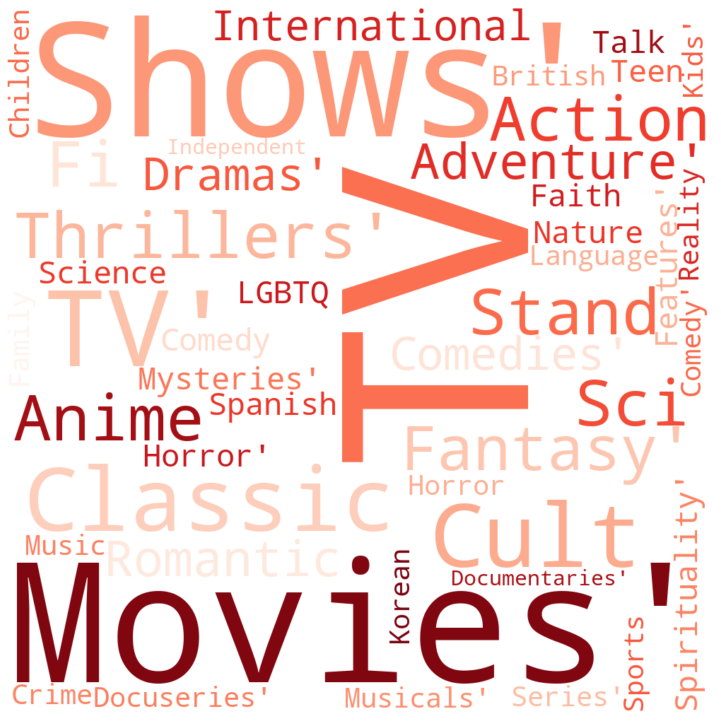

In [124]:
text2 = df_genres.genre.values
plt.rcParams['figure.figsize'] = (13, 13)

word_cloud = WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(str(text2))

plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()